# Contents
1. Imports
2. Checks
3. Customer Profiles

# 1. Imports

In [2]:
#Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Path
path = r'/Users/davidgriesel/Documents/GitHub/202409_OGS'

In [4]:
#Dataset
df = pd.read_pickle(os.path.join(path, '02 - Data', 'Prepared Data', '07_modelled_dataset.pkl'))

# 2. Checks

In [5]:
#Dimensions
df.shape

(32403719, 44)

In [6]:
#Preview
df.head()

,order_id,user_id,user_order_count,order_day_of_week,order_hour_of_day,days_since_last_order,is_first_order,product_id,add_to_cart_order,reordered,...,spending_score,activity_score,frequency_score,loyalty_score,loyalty_flag,region,age_profile,income_profile,parental_status,family_status
0,2539329,1,1,Monday,8,NaN,True,196,1,0,...,1,1,1,3.0,Low Loyalty,South,Adult,Low Income,parent,Family
1,2539329,1,1,Monday,8,NaN,True,14084,2,0,...,1,1,1,3.0,Low Loyalty,South,Adult,Low Income,parent,Family
2,2539329,1,1,Monday,8,NaN,True,12427,3,0,...,1,1,1,3.0,Low Loyalty,South,Adult,Low Income,parent,Family
3,2539329,1,1,Monday,8,NaN,True,26088,4,0,...,1,1,1,3.0,Low Loyalty,South,Adult,Low Income,parent,Family
4,2539329,1,1,Monday,8,NaN,True,26405,5,0,...,1,1,1,3.0,Low Loyalty,South,Adult,Low Income,parent,Family


# 3. Customer Profiles

## 3.1. Activity Flag

### 3.1.1. Customer Distribution

In [7]:
# Count the number of users per activity flag
user_activity_counts = df.groupby('activity_flag', observed=False)['user_id'].nunique().reset_index()
user_activity_counts

,activity_flag,user_id
0,Low Activity,131129
1,Moderate Activity,63037
2,High Activity,12043


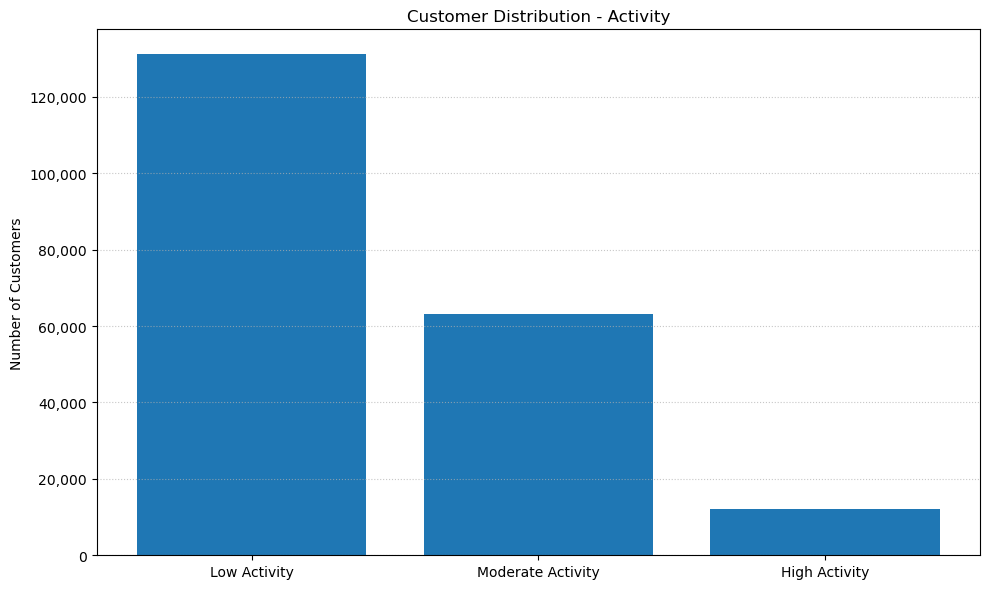

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.1.1_activity_profile.png


In [8]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(user_activity_counts['activity_flag'], user_activity_counts['user_id'])

# Set the title and labels
plt.title('Customer Distribution - Activity')
plt.xlabel('')
plt.ylabel('Number of Customers')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.1.1_activity_profile.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.1.2. Order Distribution

In [9]:
# Count the number of orders per activity flag
order_activity_counts = df['activity_flag'].value_counts().sort_index().reset_index()
order_activity_counts.columns = ['activity_flag', 'count']
order_activity_counts

,activity_flag,count
0,Low Activity,8493912
1,Moderate Activity,15940760
2,High Activity,7969047


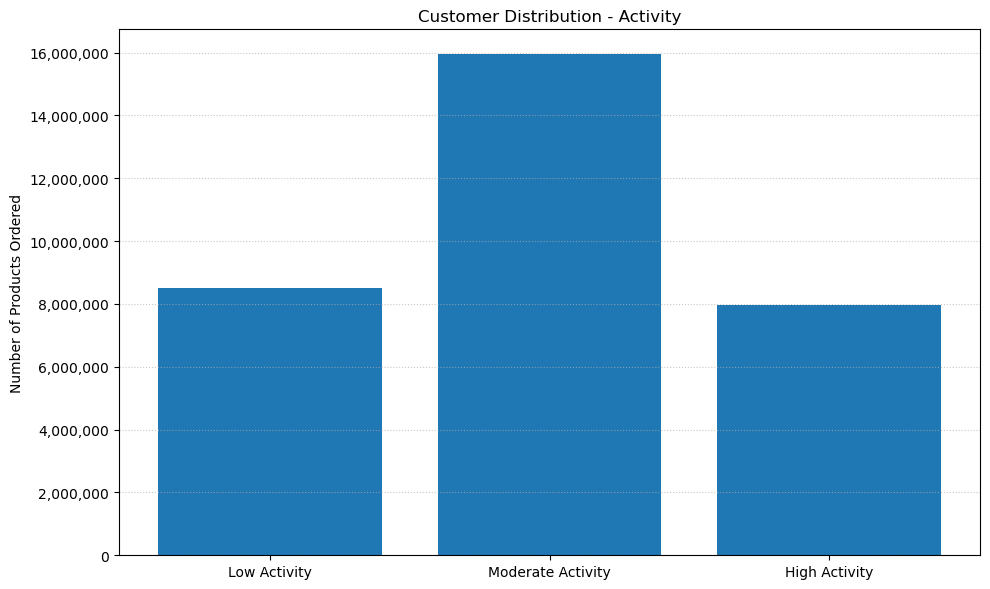

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.1.2_activity_orders.png


In [10]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(order_activity_counts['activity_flag'], order_activity_counts['count'])

# Formatting
plt.title('Customer Distribution - Activity')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.1.2_activity_orders.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.1.3. Busiest Days

In [11]:
# Create a cross-tabulation
cross_activity_days = pd.crosstab(df['activity_flag'], df['busiest_days'])
cross_activity_days

busiest_days,Least Busy Days,Moderately Busy Days,Most Busy Days
activity_flag,,,
Low Activity,1942961,3364533,3186418
Moderate Activity,3644812,6359118,5936830
High Activity,2036351,3192006,2740690


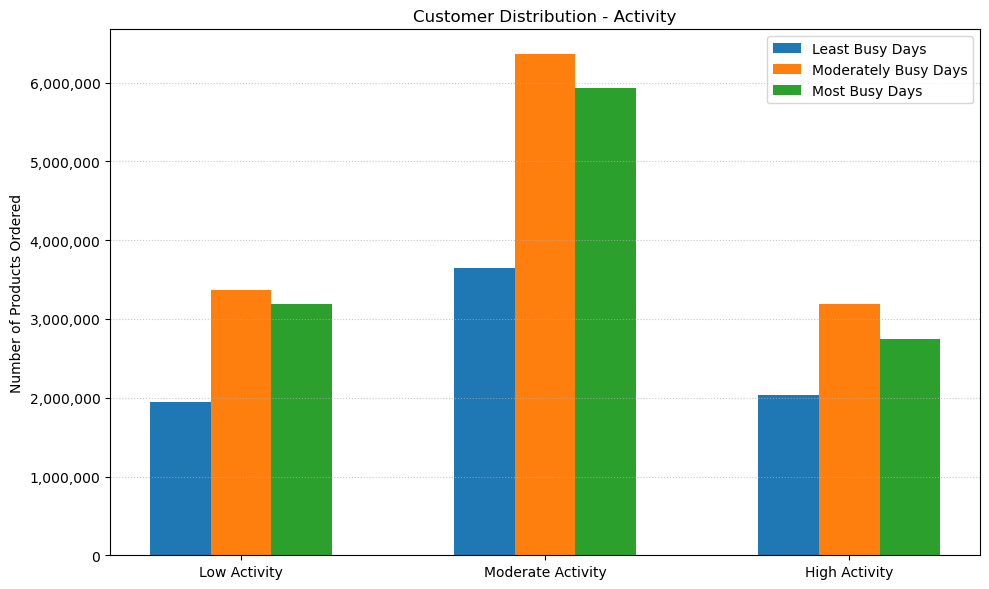

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.1.3_activity_days.png


In [12]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(cross_activity_days.index))

# Plot each category as a separate bar (grouped format)
for i, activity_days in enumerate(cross_activity_days.columns):
    plt.bar(
        x + i * bar_width, 
        cross_activity_days[activity_days], 
        width=bar_width, 
        label=activity_days
    )

# Formatting
plt.title('Customer Distribution - Activity')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(cross_activity_days.columns) - 1) / 2), cross_activity_days.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.1.3_activity_days.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.1.4. Busiest Hours

In [13]:
# Create a cross-tabulation
cross_activity_hours = pd.crosstab(df['activity_flag'], df['busiest_hours'])
cross_activity_hours

busiest_hours,Least Busy Hours,Moderately Busy Hours,Most Busy Hours
activity_flag,,,
Low Activity,232666,3282010,4979236
Moderate Activity,435318,6344256,9161186
High Activity,218819,3227518,4522710


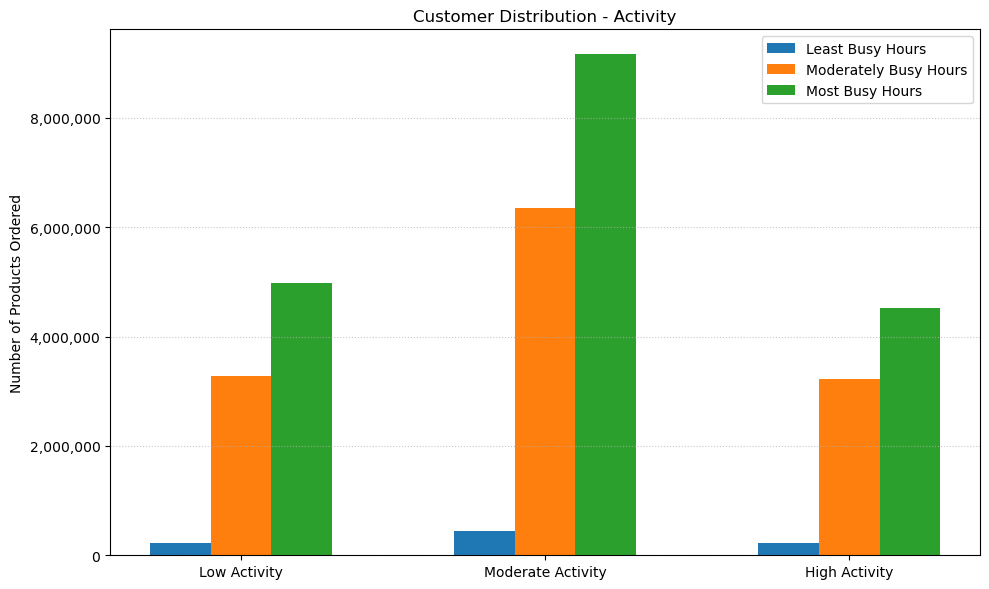

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.1.4_activity_hours.png


In [14]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(cross_activity_hours.index))

# Plot each category as a separate bar (grouped format)
for i, activity_hours in enumerate(cross_activity_hours.columns):
    plt.bar(
        x + i * bar_width, 
        cross_activity_hours[activity_hours], 
        width=bar_width, 
        label=activity_hours
    )

# Formatting
plt.title('Customer Distribution - Activity')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(cross_activity_days.columns) - 1) / 2), cross_activity_days.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.1.4_activity_hours.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.1.5. Price Label

In [15]:
# Create a cross-tabulation
cross_activity_price = pd.crosstab(df['activity_flag'], df['price_label'])
cross_activity_price

price_label,Low Price,Mid Price,High Price,Premium Price
activity_flag,,,,
Low Activity,2129151,4273477,1976719,114565
Moderate Activity,4001302,8038732,3692787,207939
High Activity,2005596,4056856,1816548,90047


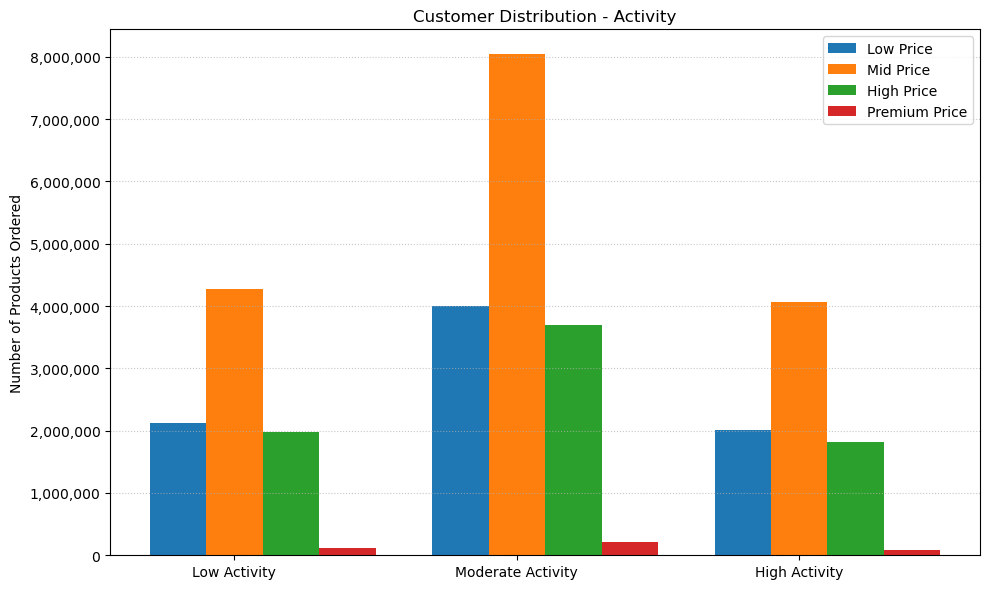

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.1.5_activity_price.png


In [16]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(cross_activity_price.index))

# Plot each category as a separate bar (grouped format)
for i, activity_price in enumerate(cross_activity_price.columns):
    plt.bar(
        x + i * bar_width, 
        cross_activity_price[activity_price], 
        width=bar_width, 
        label=activity_price
    )

# Formatting
plt.title('Customer Distribution - Activity')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(cross_activity_days.columns) - 1) / 2), cross_activity_days.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.1.5_activity_price.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 3.2. Spending Flag

### 3.2.1. Customer Distribution

In [17]:
# Count the number of users per activity flag
user_spending_counts = df.groupby('spending_flag', observed=False)['user_id'].nunique().reset_index()
user_spending_counts

,spending_flag,user_id
0,Low Spender,63734
1,Moderate Spender,82508
2,High Spender,52549
3,Premium Spender,7418


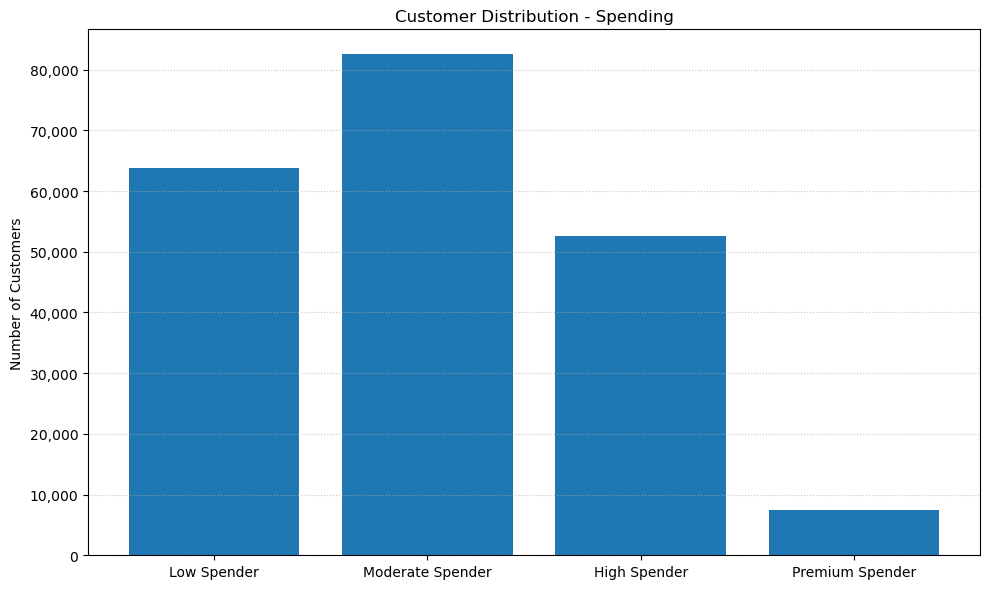

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.2.1_spending_profile.png


In [18]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(user_spending_counts['spending_flag'], user_spending_counts['user_id'])

# Set the title and labels
plt.title('Customer Distribution - Spending')
plt.xlabel('')
plt.ylabel('Number of Customers')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.2.1_spending_profile.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.2.2. Order Distribution

In [19]:
# Count the number of orders per activity flag
order_spending_counts = df['spending_flag'].value_counts().sort_index().reset_index()
order_spending_counts.columns = ['spending_flag', 'count']
order_spending_counts

,spending_flag,count
0,Low Spender,8104957
1,Moderate Spender,16189803
2,High Spender,7723577
3,Premium Spender,385382


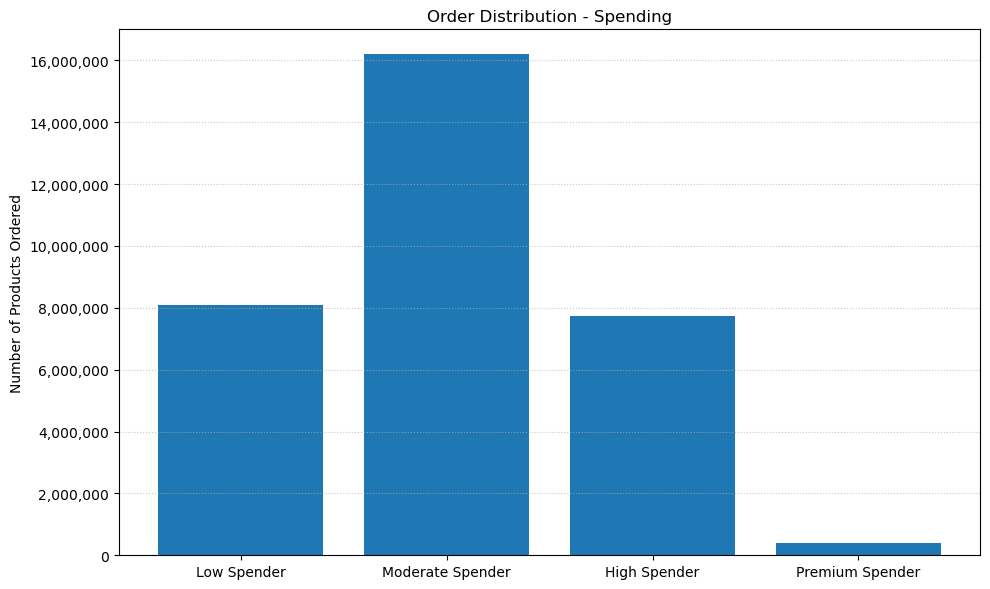

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.2.2_spending_orders.png


In [20]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(order_spending_counts['spending_flag'], order_spending_counts['count'])

# Formatting
plt.title('Order Distribution - Spending')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.2.2_spending_orders.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.2.3. Busiest Days

In [21]:
# Create a cross-tabulation
cross_spending_days = pd.crosstab(df['spending_flag'], df['busiest_days'])
cross_spending_days

busiest_days,Least Busy Days,Moderately Busy Days,Most Busy Days
spending_flag,,,
Low Spender,2004872,3220285,2879800
Moderate Spender,3770009,6443951,5975843
High Spender,1760730,3096492,2866355
Premium Spender,88513,154929,141940


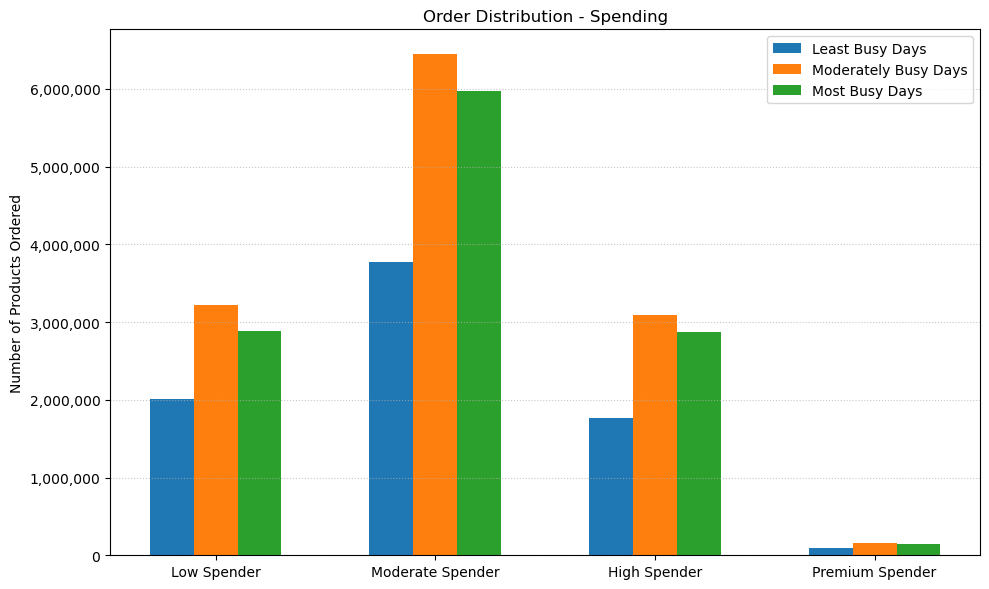

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.2.3_spending_days.png


In [22]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(cross_spending_days.index))

# Plot each category as a separate bar (grouped format)
for i, spending_days in enumerate(cross_spending_days.columns):
    plt.bar(
        x + i * bar_width, 
        cross_spending_days[spending_days], 
        width=bar_width, 
        label=spending_days
    )

# Formatting
plt.title('Order Distribution - Spending')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(cross_spending_days.columns) - 1) / 2), cross_spending_days.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.2.3_spending_days.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.2.4. Busiest Hours

In [23]:
# Create a cross-tabulation
cross_spending_hours = pd.crosstab(df['spending_flag'], df['busiest_hours'])
cross_spending_hours

busiest_hours,Least Busy Hours,Moderately Busy Hours,Most Busy Hours
spending_flag,,,
Low Spender,211000,3189220,4704737
Moderate Spender,446135,6440196,9303472
High Spender,217926,3072698,4432953
Premium Spender,11742,151670,221970


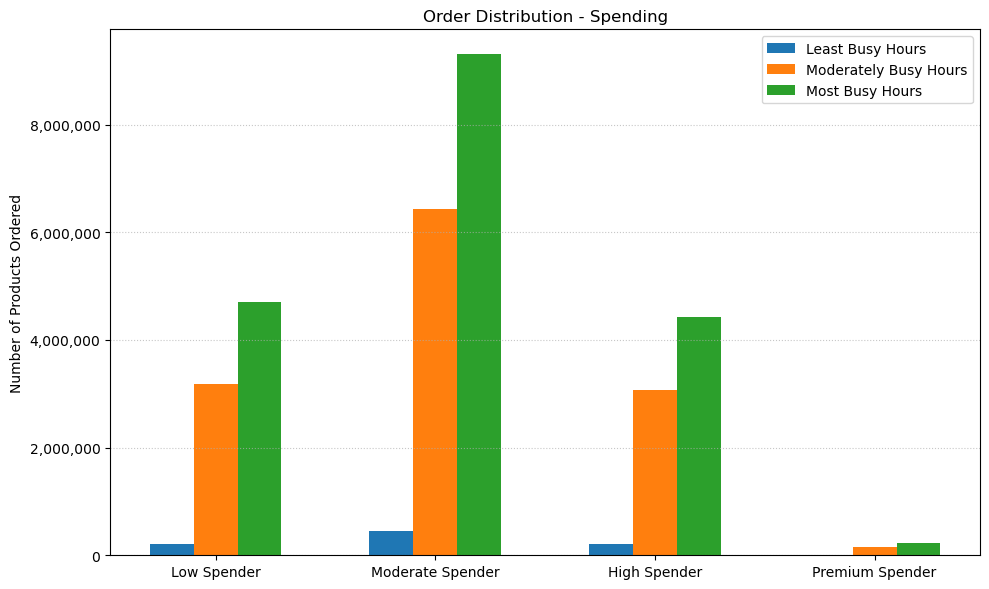

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.2.4_spending_hours.png


In [24]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(cross_spending_hours.index))

# Plot each category as a separate bar (grouped format)
for i, spending_hours in enumerate(cross_spending_hours.columns):
    plt.bar(
        x + i * bar_width, 
        cross_spending_hours[spending_hours], 
        width=bar_width, 
        label=spending_hours
    )
# Formatting
plt.title('Order Distribution - Spending')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(cross_spending_hours.columns) - 1) / 2), cross_spending_hours.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.2.4_spending_hours.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.2.5. Price Label

In [25]:
# Create a cross-tabulation
cross_spending_price = pd.crosstab(df['spending_flag'], df['price_label'])
cross_spending_price

price_label,Low Price,Mid Price,High Price,Premium Price
spending_flag,,,,
Low Spender,2602686,4062367,1396091,43813
Moderate Spender,3979355,8295244,3730509,184695
High Spender,1503413,3841491,2214791,163882
Premium Spender,50595,169963,144663,20161


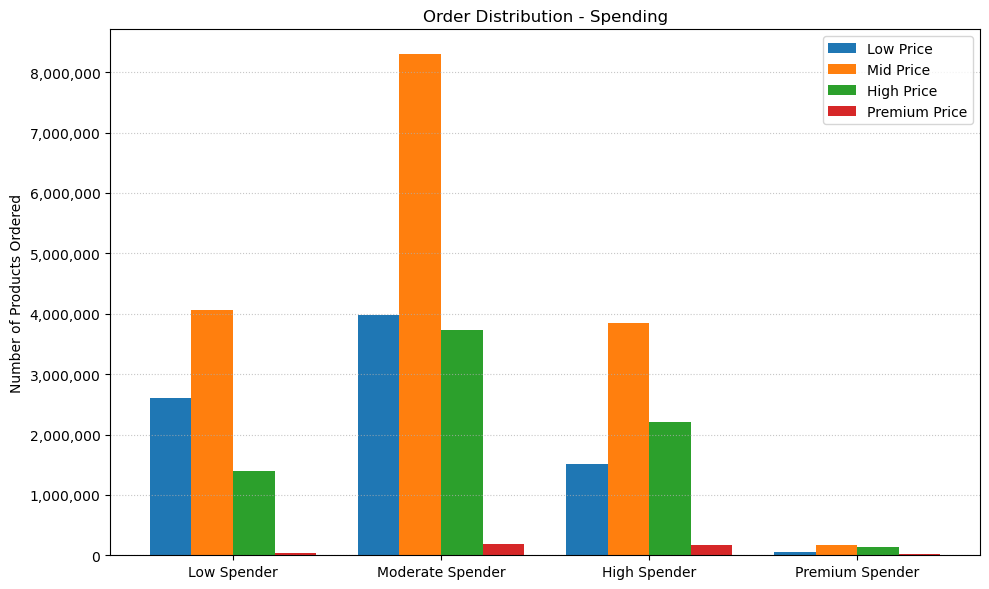

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.2.5_spending_price.png


In [26]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(cross_spending_price.index))

# Plot each category as a separate bar (grouped format)
for i, spending_price in enumerate(cross_spending_price.columns):
    plt.bar(
        x + i * bar_width, 
        cross_spending_price[spending_price], 
        width=bar_width, 
        label=spending_price
    )
    
# Formatting
plt.title('Order Distribution - Spending')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(cross_spending_price.columns) - 1) / 2), cross_spending_price.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.2.5_spending_price.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 3.3. Frequency Flag

### 3.3.1. Customer Distribution

In [27]:
# Count the number of users per activity flag
user_frequency_counts = df.groupby('frequency_flag', observed=False)['user_id'].nunique().reset_index()
user_frequency_counts

,frequency_flag,user_id
0,Rare Shopper,97169
1,Occasional Shopper,75152
2,Frequent Shopper,33888


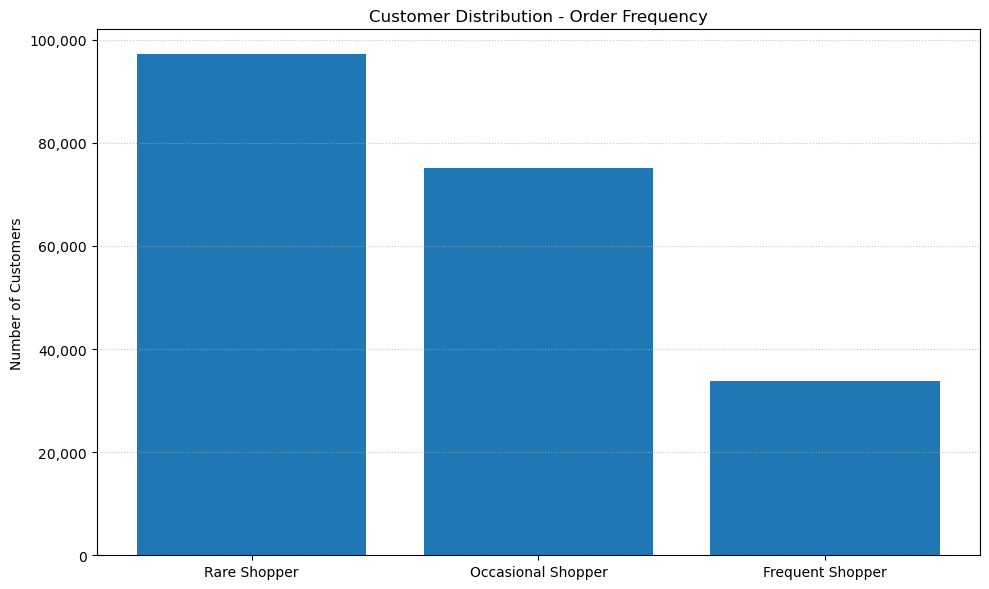

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.3.1_frequency_profile.png


In [28]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(user_frequency_counts['frequency_flag'], user_frequency_counts['user_id'])

# Set the title and labels
plt.title('Customer Distribution - Order Frequency')
plt.xlabel('')
plt.ylabel('Number of Customers')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.3.1_frequency_profile.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.3.2. Order Distribution

In [29]:
# Count the number of orders per activity flag
order_frequency_counts = df['frequency_flag'].value_counts().sort_index().reset_index()
order_frequency_counts.columns = ['frequency_flag', 'count']
order_frequency_counts

,frequency_flag,count
0,Rare Shopper,7689526
1,Occasional Shopper,14622992
2,Frequent Shopper,10091201


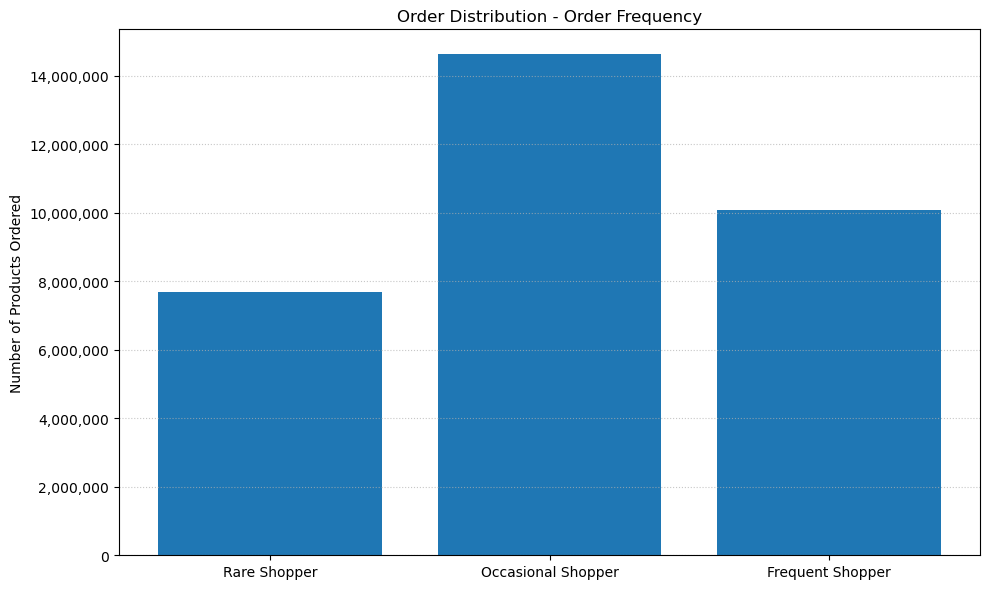

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.3.2_frequency_orders.png


In [30]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(order_frequency_counts['frequency_flag'], order_frequency_counts['count'])

# Formatting
plt.title('Order Distribution - Order Frequency')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.3.2_frequency_orders.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.3.3. Busiest Days

In [31]:
# Create a cross-tabulation
cross_frequency_days = pd.crosstab(df['frequency_flag'], df['busiest_days'])
cross_frequency_days

busiest_days,Least Busy Days,Moderately Busy Days,Most Busy Days
frequency_flag,,,
Rare Shopper,1737356,3015786,2936384
Occasional Shopper,3175108,5857508,5590376
Frequent Shopper,2711660,4042363,3337178


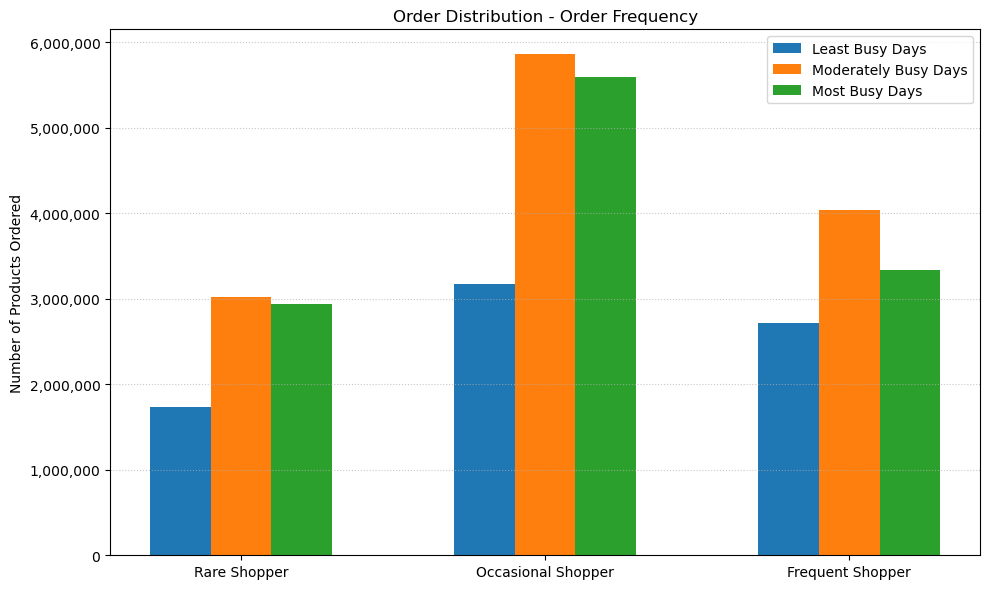

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.3.3_frequency_days.png


In [32]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(cross_frequency_days.index))

# Plot each category as a separate bar (grouped format)
for i, frequency_days in enumerate(cross_frequency_days.columns):
    plt.bar(
        x + i * bar_width, 
        cross_frequency_days[frequency_days], 
        width=bar_width, 
        label=frequency_days
    )

# Formatting
plt.title('Order Distribution - Order Frequency')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(cross_frequency_days.columns) - 1) / 2), cross_frequency_days.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.3.3_frequency_days.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.3.4. Busiest Hours

In [33]:
# Create a cross-tabulation
cross_frequency_hours = pd.crosstab(df['frequency_flag'], df['busiest_hours'])
cross_frequency_hours

busiest_hours,Least Busy Hours,Moderately Busy Hours,Most Busy Hours
frequency_flag,,,
Rare Shopper,206405,2945575,4537546
Occasional Shopper,386683,5833231,8403078
Frequent Shopper,293715,4074978,5722508


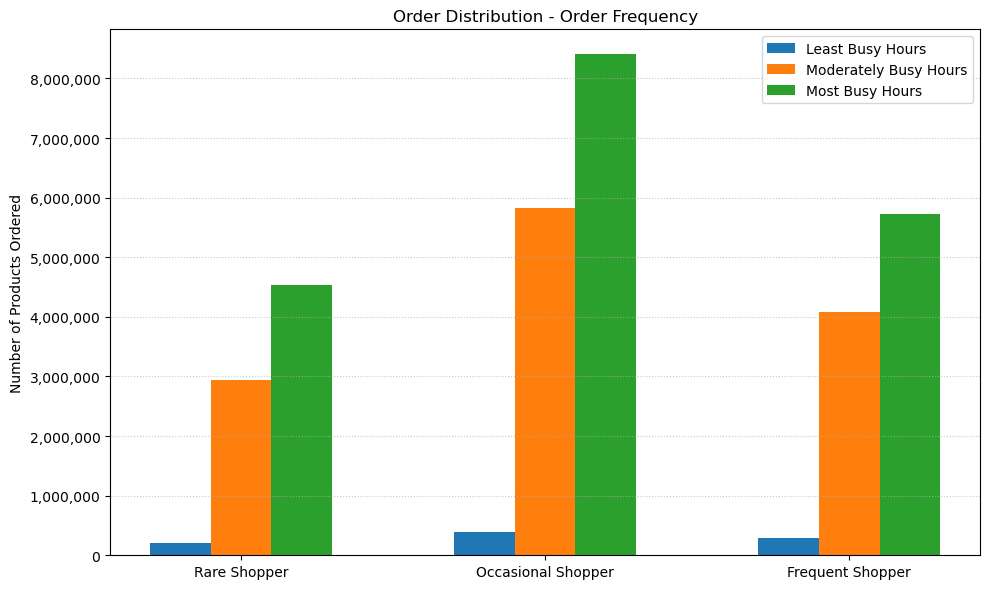

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.3.4_frequency_hours.png


In [34]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(cross_frequency_hours.index))

# Plot each category as a separate bar (grouped format)
for i, frequency_hours in enumerate(cross_frequency_hours.columns):
    plt.bar(
        x + i * bar_width, 
        cross_frequency_hours[frequency_hours], 
        width=bar_width, 
        label=frequency_hours
    )

# Formatting
plt.title('Order Distribution - Order Frequency')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(cross_frequency_hours.columns) - 1) / 2), cross_frequency_hours.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.3.4_frequency_hours.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.3.5. Price Label

In [35]:
# Create a cross-tabulation
order_frequency_price = pd.crosstab(df['frequency_flag'], df['price_label'])
order_frequency_price

price_label,Low Price,Mid Price,High Price,Premium Price
frequency_flag,,,,
Rare Shopper,1940724,3860326,1784921,103555
Occasional Shopper,3680672,7368727,3384221,189372
Frequent Shopper,2514653,5140012,2316912,119624


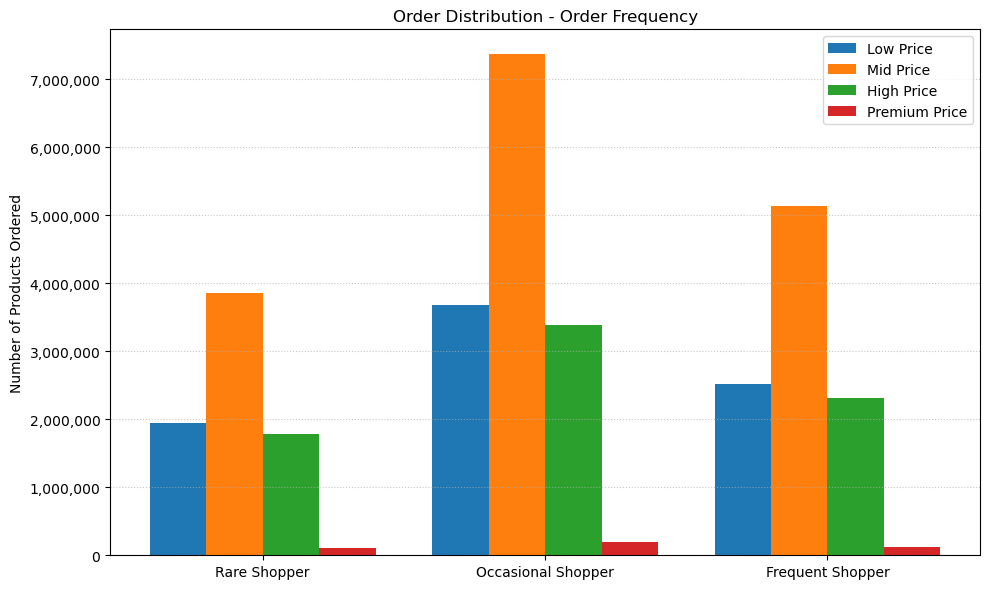

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.3.5_frequency_price.png


In [36]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(order_frequency_price.index))

# Plot each category as a separate bar (grouped format)
for i, frequency_price in enumerate(order_frequency_price.columns):
    plt.bar(
        x + i * bar_width, 
        order_frequency_price[frequency_price], 
        width=bar_width, 
        label=frequency_price
    )

# Formatting
plt.title('Order Distribution - Order Frequency')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(order_frequency_price.columns) - 1) / 2), order_frequency_price.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.3.5_frequency_price.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 3.4. Loyalty Flag

### 3.4.1. Customer Distribution

In [37]:
# Count the number of users per activity flag
user_loyalty_counts = df.groupby('loyalty_flag', observed=False)['user_id'].nunique().reset_index()
user_loyalty_counts

,loyalty_flag,user_id
0,Low Loyalty,128224
1,Moderate Loyalty,65781
2,High Loyalty,12204


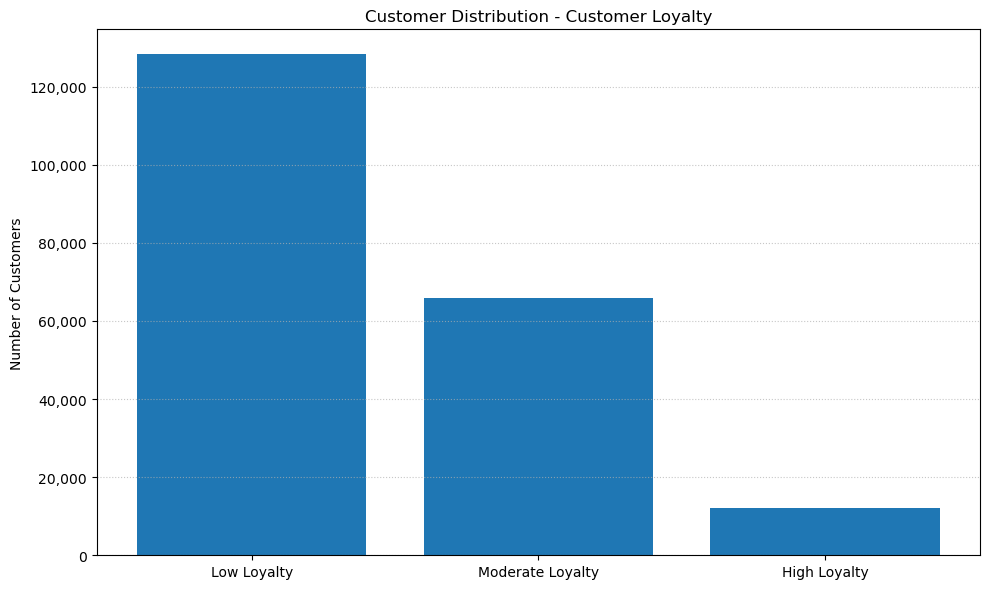

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.4.1_loyalty_profile.png


In [38]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(user_loyalty_counts['loyalty_flag'], user_loyalty_counts['user_id'])

# Set the title and labels
plt.title('Customer Distribution - Customer Loyalty')
plt.xlabel('')
plt.ylabel('Number of Customers')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.4.1_loyalty_profile.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.4.2. Order Distribution

In [39]:
# Count the number of orders per activity flag
order_loyalty_counts = df['loyalty_flag'].value_counts().sort_index().reset_index()
order_loyalty_counts.columns = ['loyalty_flag', 'count']
order_loyalty_counts

,loyalty_flag,count
0,Low Loyalty,11515975
1,Moderate Loyalty,14707925
2,High Loyalty,6179819


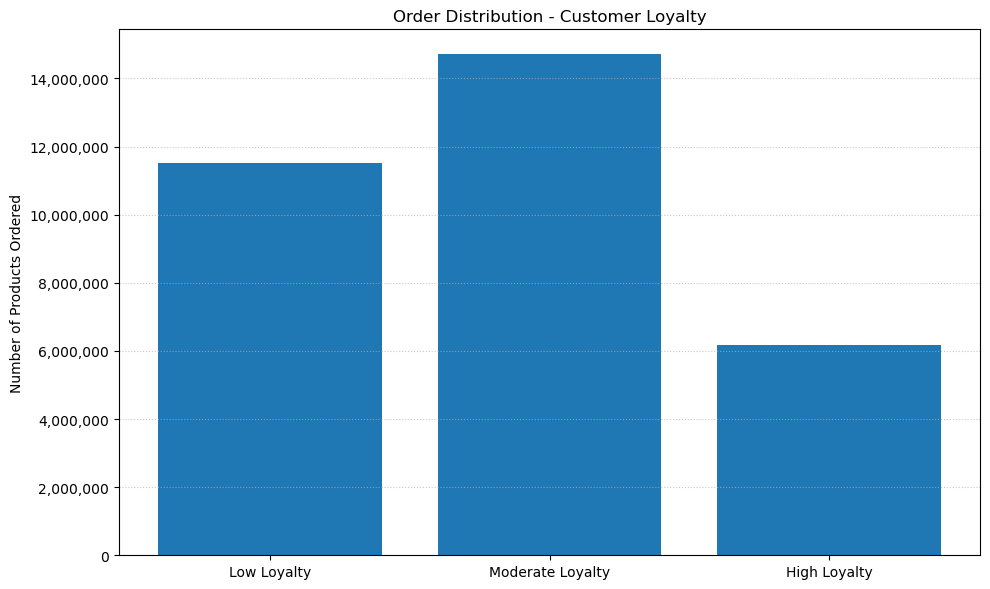

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.4.2_loyalty_orders.png


In [40]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(order_loyalty_counts['loyalty_flag'], order_loyalty_counts['count'])

# Formatting
plt.title('Order Distribution - Customer Loyalty')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.4.2_loyalty_orders.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.4.3. Busiest Days

In [41]:
# Create a cross-tabulation
cross_loyalty_days = pd.crosstab(df['loyalty_flag'], df['busiest_days'])
cross_loyalty_days

busiest_days,Least Busy Days,Moderately Busy Days,Most Busy Days
loyalty_flag,,,
Low Loyalty,2636562,4550375,4329038
Moderate Loyalty,3376053,5885098,5446774
High Loyalty,1611509,2480184,2088126


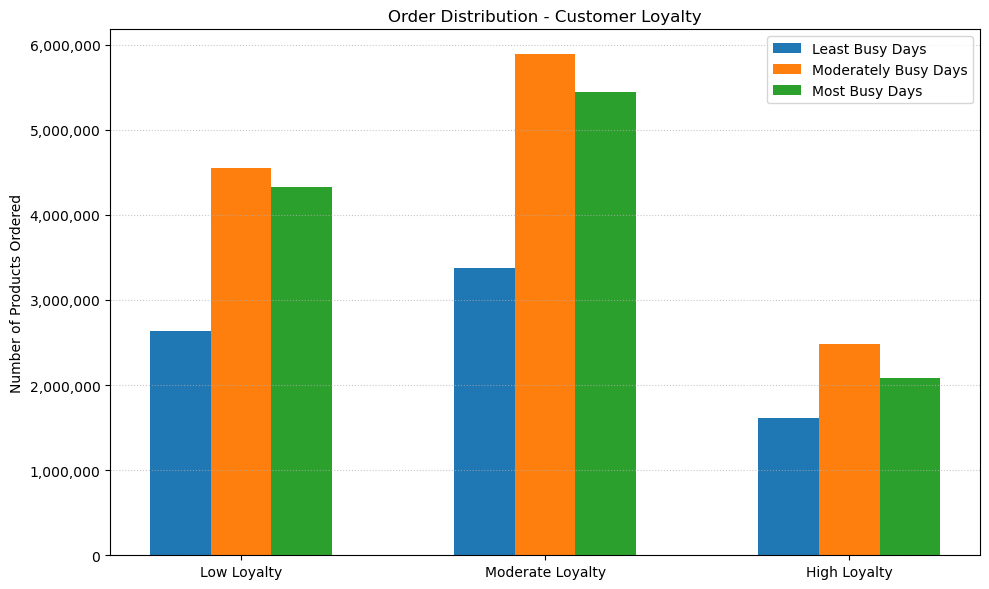

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.4.3_loyalty.days.png


In [42]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(cross_loyalty_days.index))

# Plot each category as a separate bar (grouped format)
for i, loyalty_days in enumerate(cross_loyalty_days.columns):
    plt.bar(
        x + i * bar_width, 
        cross_loyalty_days[loyalty_days], 
        width=bar_width, 
        label=loyalty_days
    )
    
plt.title('Order Distribution - Customer Loyalty')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(cross_loyalty_days.columns) - 1) / 2), cross_loyalty_days.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.4.3_loyalty.days.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.4.4. Busiest Hours

In [43]:
# Create a cross-tabulation
cross_loyalty_hours = pd.crosstab(df['loyalty_flag'], df['busiest_hours'])
cross_loyalty_hours

busiest_hours,Least Busy Hours,Moderately Busy Hours,Most Busy Hours
loyalty_flag,,,
Low Loyalty,308042,4476317,6731616
Moderate Loyalty,397891,5851857,8458177
High Loyalty,180870,2525610,3473339


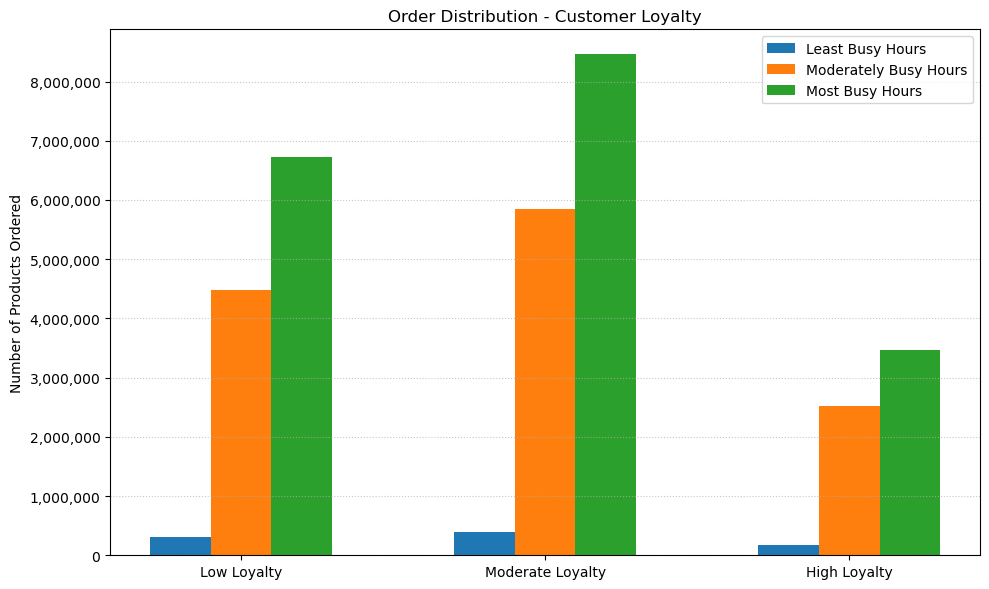

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.4.4_loyalty.hours.png


In [44]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(cross_loyalty_hours.index))

# Plot each category as a separate bar (grouped format)
for i, loyalty_hours in enumerate(cross_loyalty_hours.columns):
    plt.bar(
        x + i * bar_width, 
        cross_loyalty_hours[loyalty_hours], 
        width=bar_width, 
        label=loyalty_hours
    )

# Formatting
plt.title('Order Distribution - Customer Loyalty')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(cross_loyalty_hours.columns) - 1) / 2), cross_loyalty_hours.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.4.4_loyalty.hours.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.4.5. Price Label

In [45]:
# Create a cross-tabulation
order_loyalty_price = pd.crosstab(df['loyalty_flag'], df['price_label'])
order_loyalty_price

price_label,Low Price,Mid Price,High Price,Premium Price
loyalty_flag,,,,
Low Loyalty,3184791,5802403,2413921,114860
Moderate Loyalty,3572950,7425667,3506706,202602
High Loyalty,1378308,3140995,1565427,95089


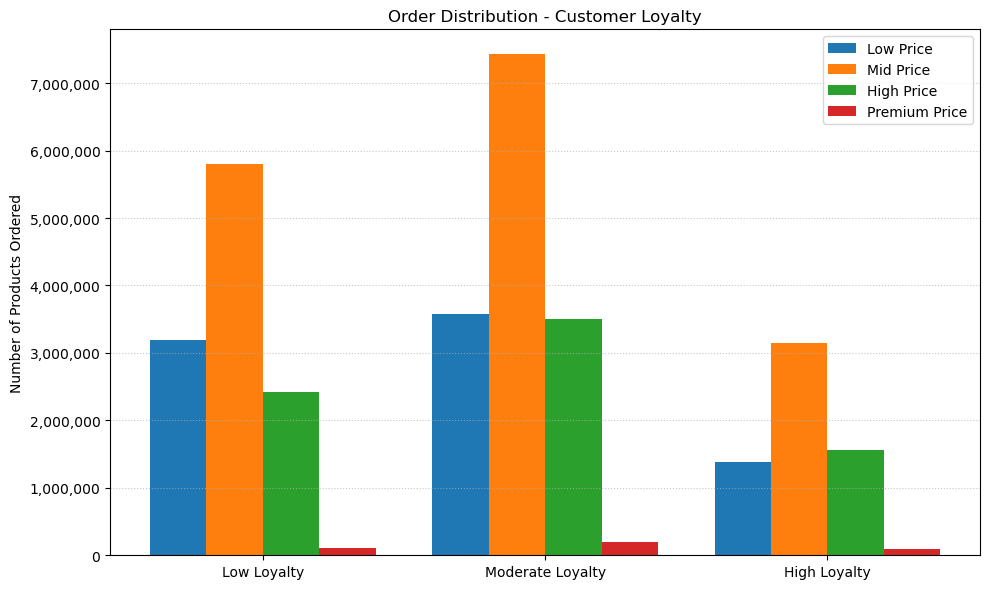

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.4.5_loyalty.price.png


In [46]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(order_loyalty_price.index))

# Plot each category as a separate bar (grouped format)
for i, loyalty_price in enumerate(order_loyalty_price.columns):
    plt.bar(
        x + i * bar_width, 
        order_loyalty_price[loyalty_price], 
        width=bar_width, 
        label=loyalty_price
    )
    
# Formatting
plt.title('Order Distribution - Customer Loyalty')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(order_loyalty_price.columns) - 1) / 2), order_loyalty_price.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.4.5_loyalty.price.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 3.5. Region

### 3.5.1. Customer Distribution

In [47]:
# Count the number of users per activity flag
region_counts = df.groupby('region', observed=False)['user_id'].nunique().reset_index()
region_counts

,region,user_id
0,West,52565
1,Midwest,48519
2,South,68737
3,Northeast,36388


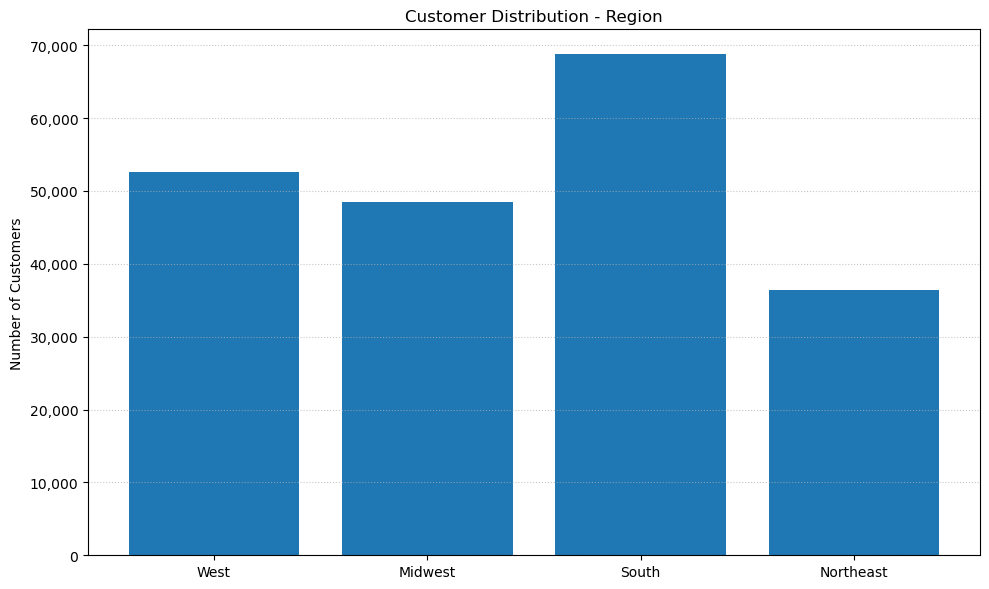

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.5.1_region_profile.png


In [48]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(region_counts['region'], region_counts['user_id'])

# Set the title and labels
plt.title('Customer Distribution - Region')
plt.xlabel('')
plt.ylabel('Number of Customers')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.5.1_region_profile.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.5.2. Order Distribution

In [49]:
# Count the number of orders per activity flag
order_region_counts = df['region'].value_counts().sort_index().reset_index()
order_region_counts.columns = ['region', 'count']
order_region_counts

,region,count
0,West,8292641
1,Midwest,7597015
2,South,10791513
3,Northeast,5722550


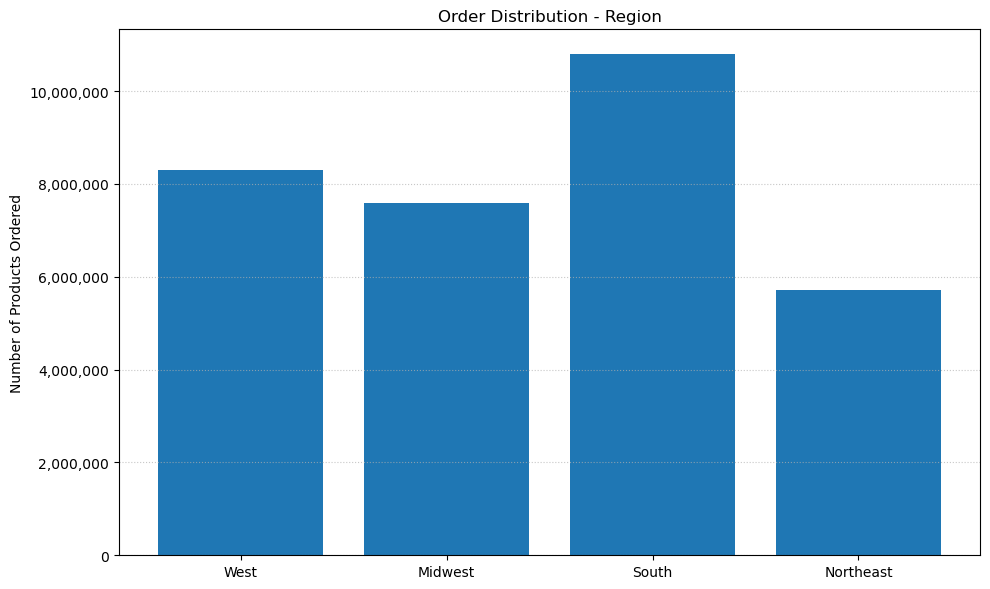

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.5.2_region_orders.png


In [50]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(order_region_counts['region'], order_region_counts['count'])

# Formatting
plt.title('Order Distribution - Region')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.5.2_region_orders.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.5.3. Busiest Days

In [51]:
# Create a cross-tabulation
cross_region_days = pd.crosstab(df['region'], df['busiest_days'])
cross_region_days

busiest_days,Least Busy Days,Moderately Busy Days,Most Busy Days
region,,,
West,1949546,3301786,3041309
Midwest,1783172,3033038,2780805
South,2545802,4301026,3944685
Northeast,1345604,2279807,2097139


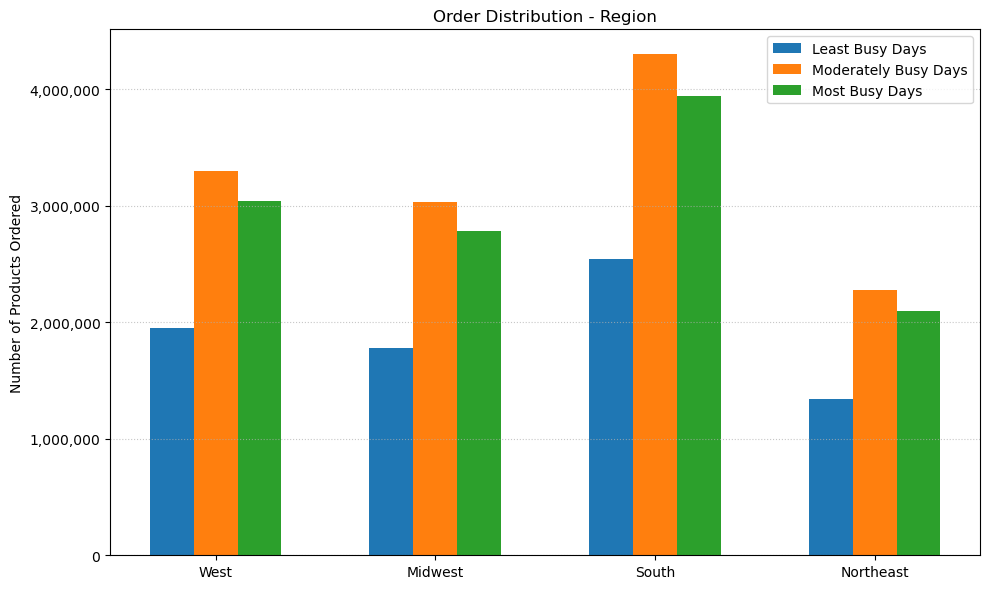

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.5.3_region.days.png


In [52]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(cross_region_days.index))

# Plot each category as a separate bar (grouped format)
for i, region_days in enumerate(cross_region_days.columns):
    plt.bar(
        x + i * bar_width, 
        cross_region_days[region_days], 
        width=bar_width, 
        label=region_days
    )
   
# Formatting
plt.title('Order Distribution - Region')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(cross_region_days.columns) - 1) / 2), cross_region_days.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.5.3_region.days.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.5.4. Busiest Hours

In [53]:
# Create a cross-tabulation
cross_region_hours = pd.crosstab(df['region'], df['busiest_hours'])
cross_region_hours

busiest_hours,Least Busy Hours,Moderately Busy Hours,Most Busy Hours
region,,,
West,224642,3269837,4798162
Midwest,206846,3020203,4369966
South,298116,4296277,6197120
Northeast,157199,2267467,3297884


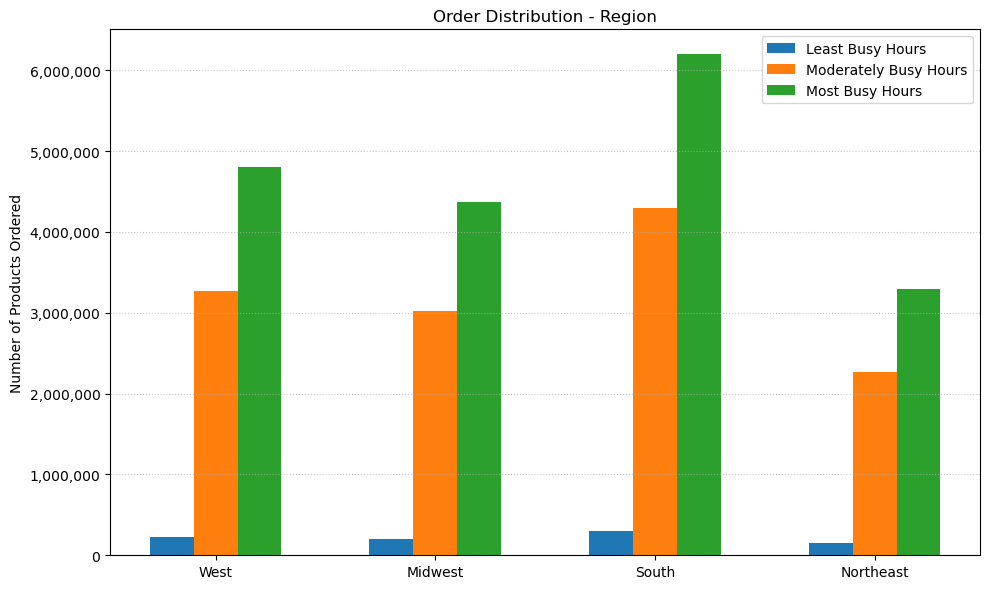

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.5.4_region.hours.png


In [54]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(cross_region_hours.index))

# Plot each category as a separate bar (grouped format)
for i, region_hours in enumerate(cross_region_hours.columns):
    plt.bar(
        x + i * bar_width, 
        cross_region_hours[region_hours], 
        width=bar_width, 
        label=region_hours
    )

# Formatting
plt.title('Order Distribution - Region')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(cross_region_hours.columns) - 1) / 2), cross_region_hours.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.5.4_region.hours.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.5.5. Price Label

In [55]:
# Create a cross-tabulation
order_region_price = pd.crosstab(df['region'], df['price_label'])
order_region_price

price_label,Low Price,Mid Price,High Price,Premium Price
region,,,,
West,2082910,4191664,1912133,105934
Midwest,1905738,3838473,1756146,96658
South,2706944,5449574,2497394,137601
Northeast,1440457,2889354,1320381,72358


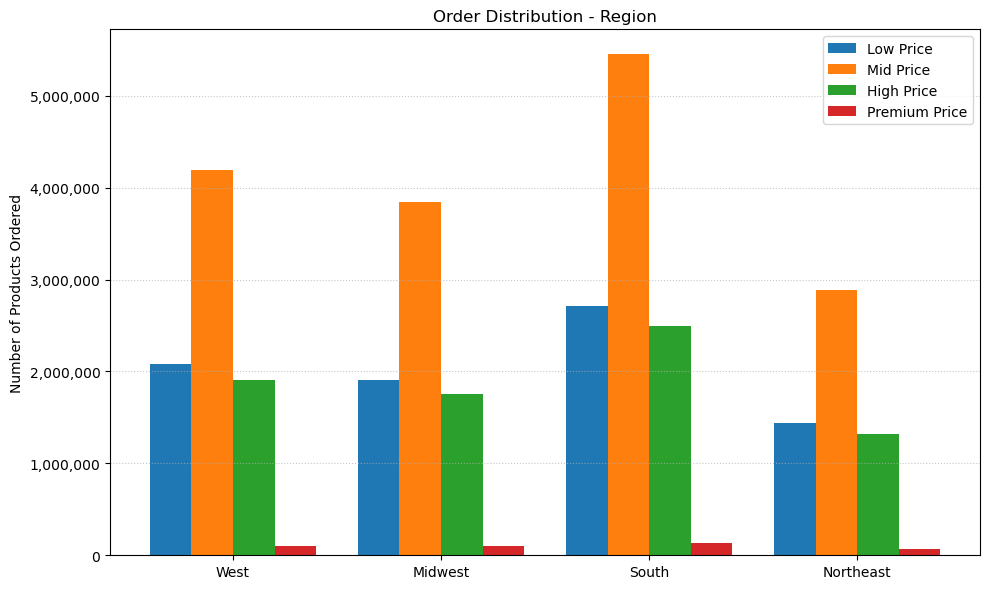

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.5.5_region_price.png


In [56]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(order_region_price.index))

# Plot each category as a separate bar (grouped format)
for i, region_price in enumerate(order_region_price.columns):
    plt.bar(
        x + i * bar_width, 
        order_region_price[region_price], 
        width=bar_width, 
        label=region_price
    )
    
# Formatting
plt.title('Order Distribution - Region')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(order_region_price.columns) - 1) / 2), order_region_price.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.5.5_region_price.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 3.6. Age Profile

### 3.6.1. Customer Distribution

In [57]:
# Count the number of users per activity flag
age_counts = df.groupby('age_profile', observed=False)['user_id'].nunique().reset_index()
age_counts

,age_profile,user_id
0,Young Adult,25687
1,Adult,64516
2,Middle Aged,64422
3,Senior,51584


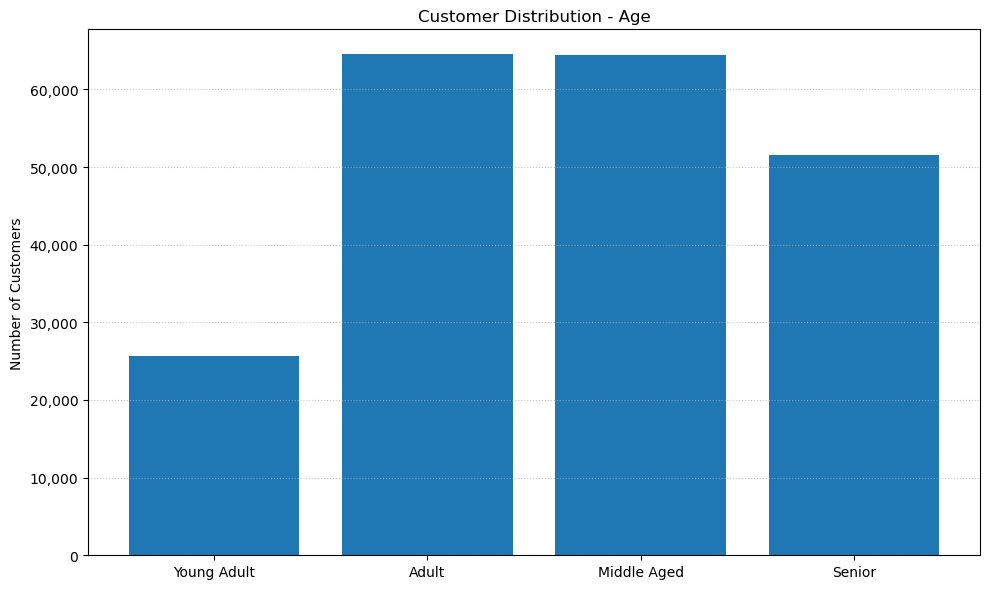

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.6.1_age_profile.png


In [58]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(age_counts['age_profile'], age_counts['user_id'])

# Set the title and labels
plt.title('Customer Distribution - Age')
plt.xlabel('')
plt.ylabel('Number of Customers')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.6.1_age_profile.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.6.2. Order Distribution

In [59]:
# Count the number of orders per activity flag
order_age_counts = df['age_profile'].value_counts().sort_index().reset_index()
order_age_counts.columns = ['age_profile', 'count']
order_age_counts

,age_profile,count
0,Young Adult,4045031
1,Adult,10155790
2,Middle Aged,10115107
3,Senior,8087791


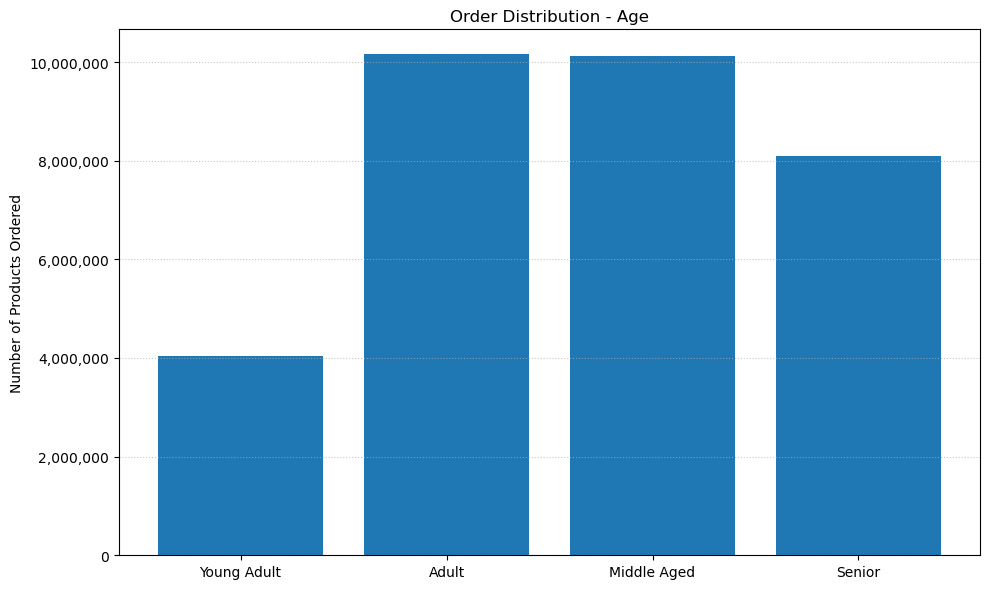

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.6.2_age_orders.png


In [60]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(order_age_counts['age_profile'], order_age_counts['count'])

# Formatting
plt.title('Order Distribution - Age')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.6.2_age_orders.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.6.3. Busiest Days

In [61]:
# Create a cross-tabulation
cross_age_days = pd.crosstab(df['age_profile'], df['busiest_days'])
cross_age_days

busiest_days,Least Busy Days,Moderately Busy Days,Most Busy Days
age_profile,,,
Young Adult,948377,1614307,1482347
Adult,2390205,4023097,3742488
Middle Aged,2383207,4040378,3691522
Senior,1902335,3237875,2947581


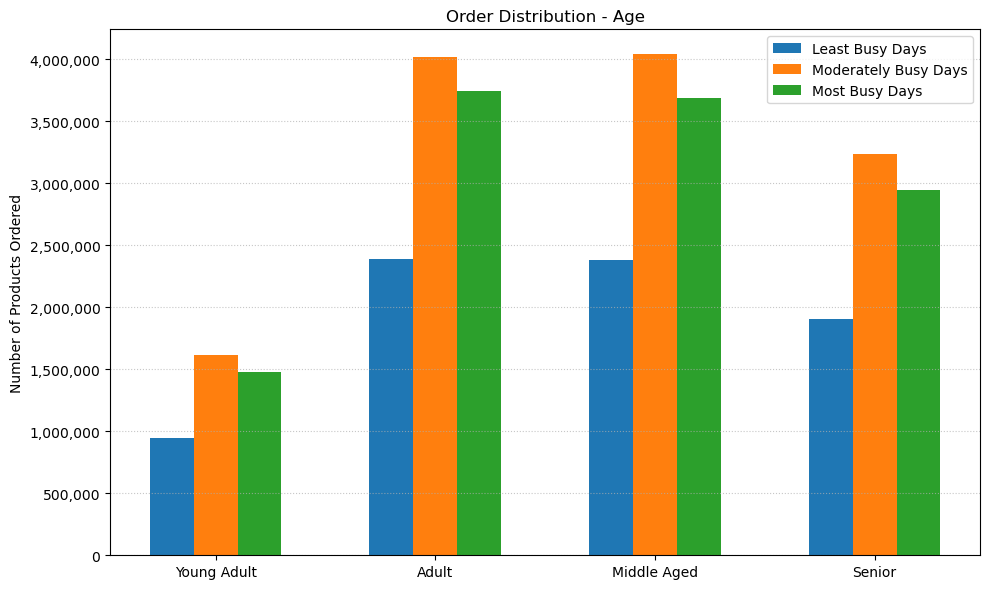

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.6.3_age_days.png


In [62]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(cross_age_days.index))

# Plot each category as a separate bar (grouped format)
for i, age_days in enumerate(cross_age_days.columns):
    plt.bar(
        x + i * bar_width, 
        cross_age_days[age_days], 
        width=bar_width, 
        label=age_days
    )
   
# Formatting
plt.title('Order Distribution - Age')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(cross_age_days.columns) - 1) / 2), cross_age_days.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.6.3_age_days.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.6.4. Busiest Hours

In [63]:
# Create a cross-tabulation
cross_age_hours = pd.crosstab(df['age_profile'], df['busiest_hours'])
cross_age_hours

busiest_hours,Least Busy Hours,Moderately Busy Hours,Most Busy Hours
age_profile,,,
Young Adult,117405,1591683,2335943
Adult,279061,4021540,5855189
Middle Aged,269901,4016605,5828601
Senior,220436,3223956,4643399


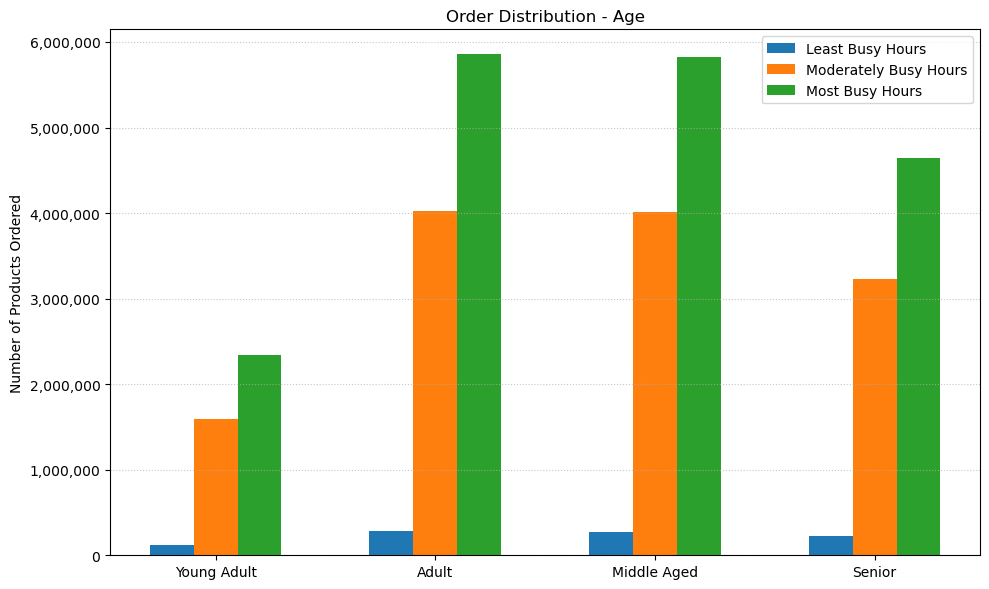

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.6.4_age_hours.png


In [64]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(cross_age_hours.index))

# Plot each category as a separate bar (grouped format)
for i, region_hours in enumerate(cross_age_hours.columns):
    plt.bar(
        x + i * bar_width, 
        cross_age_hours[region_hours], 
        width=bar_width, 
        label=region_hours
    )

# Formatting
plt.title('Order Distribution - Age')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(cross_age_hours.columns) - 1) / 2), cross_age_hours.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.6.4_age_hours.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.6.5. Price Label

In [65]:
# Create a cross-tabulation
order_age_price = pd.crosstab(df['age_profile'], df['price_label'])
order_age_price

price_label,Low Price,Mid Price,High Price,Premium Price
age_profile,,,,
Young Adult,1016322,2043103,934035,51571
Adult,2551054,5130232,2345982,128522
Middle Aged,2535027,5116060,2335990,128030
Senior,2033646,4079670,1870047,104428


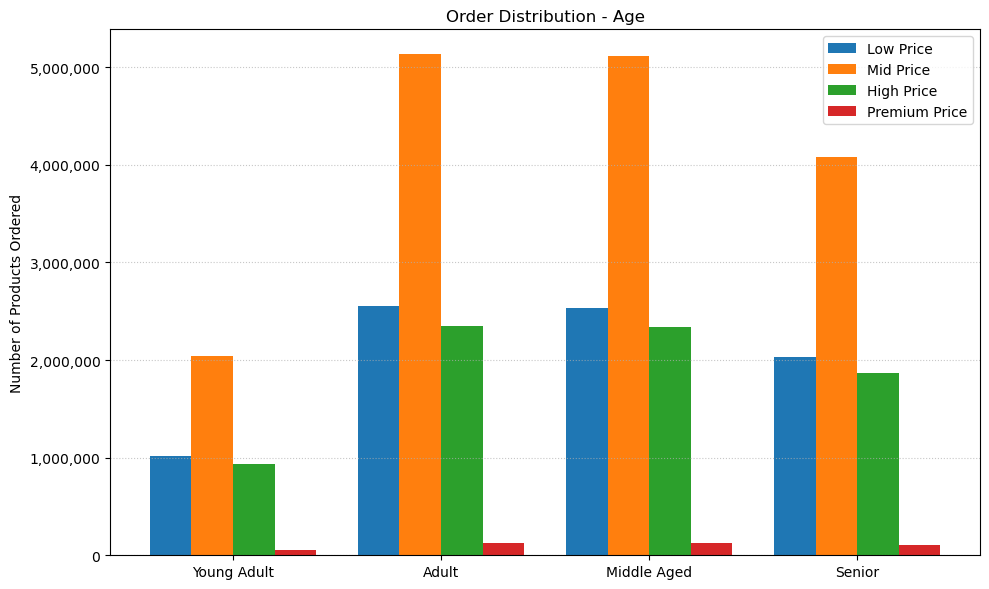

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.6.5_age_price.png


In [66]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(order_age_price.index))

# Plot each category as a separate bar (grouped format)
for i, age_price in enumerate(order_age_price.columns):
    plt.bar(
        x + i * bar_width, 
        order_age_price[age_price], 
        width=bar_width, 
        label=age_price
    )
    
# Formatting
plt.title('Order Distribution - Age')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(order_age_price.columns) - 1) / 2), order_age_price.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.6.5_age_price.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 3.7. Income Profile

### 3.7.1. Customer Distribution

In [67]:
# Count the number of users per activity flag
income_counts = df.groupby('income_profile', observed=False)['user_id'].nunique().reset_index()
income_counts

,income_profile,user_id
0,Low Income,59716
1,Middle Income,95749
2,High Income,50744


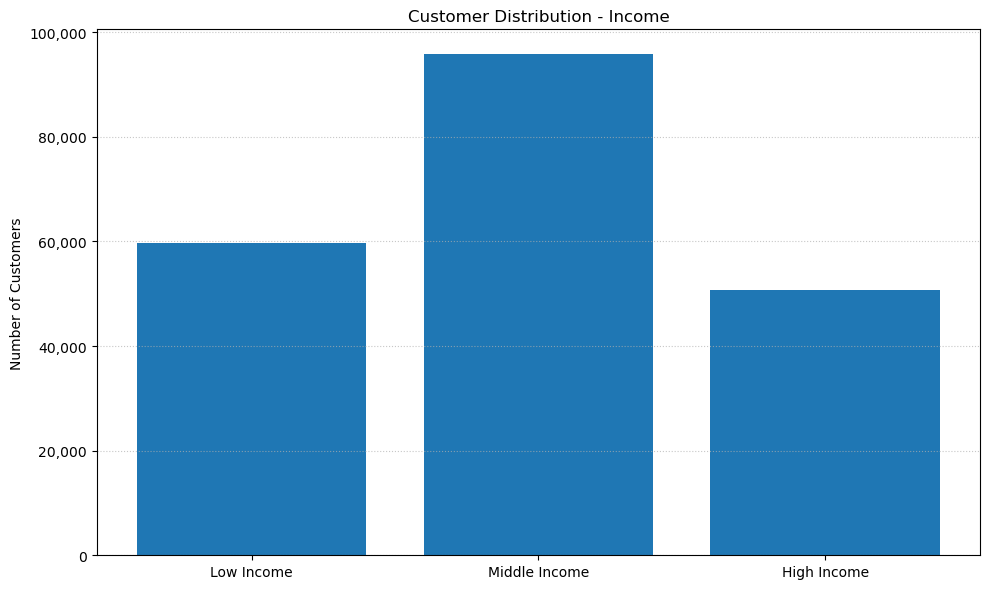

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.7.1_income_profile.png


In [68]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(income_counts['income_profile'], income_counts['user_id'])

# Set the title and labels
plt.title('Customer Distribution - Income')
plt.xlabel('')
plt.ylabel('Number of Customers')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.7.1_income_profile.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.7.2. Order Distribution

In [69]:
# Count the number of orders per activity flag
order_income_counts = df['income_profile'].value_counts().sort_index().reset_index()
order_income_counts.columns = ['income_profile', 'count']
order_income_counts

,income_profile,count
0,Low Income,7520933
1,Middle Income,16252145
2,High Income,8630641


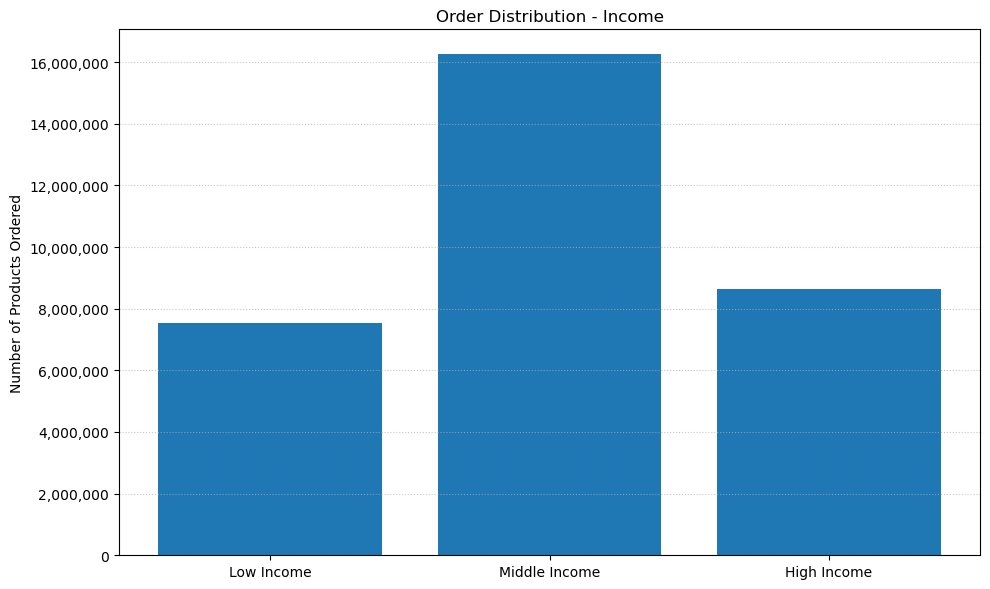

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.7.2_income_orders.png


In [70]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(order_income_counts['income_profile'], order_income_counts['count'])

# Formatting
plt.title('Order Distribution - Income')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.7.2_income_orders.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.7.3. Busiest Days

In [71]:
# Create a cross-tabulation
cross_income_days = pd.crosstab(df['income_profile'], df['busiest_days'])
cross_income_days

busiest_days,Least Busy Days,Moderately Busy Days,Most Busy Days
income_profile,,,
Low Income,1831194,2985805,2703934
Middle Income,3772302,6488147,5991696
High Income,2020628,3441705,3168308


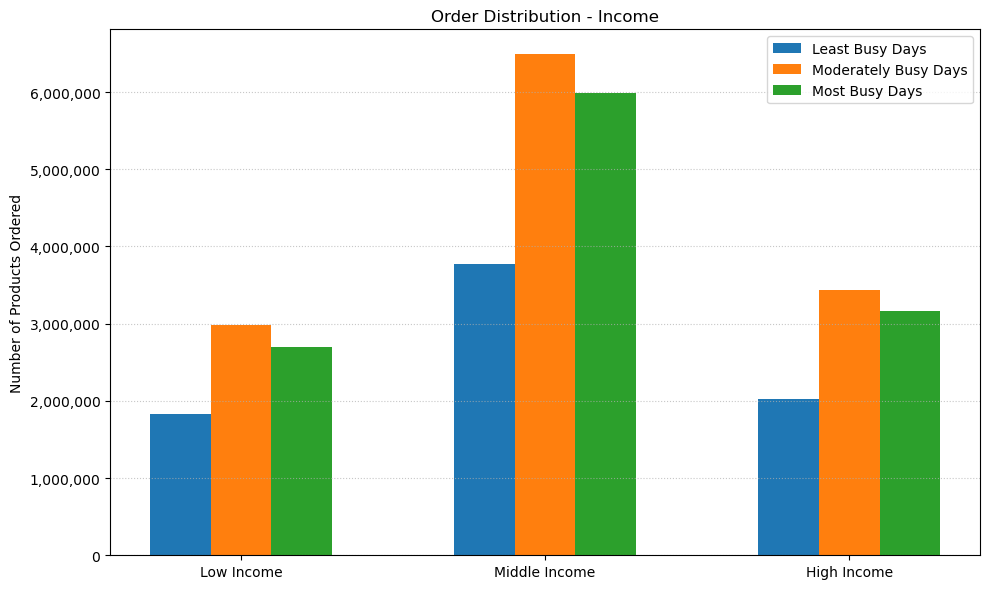

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.7.3_income_days.png


In [72]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(cross_income_days.index))

# Plot each category as a separate bar (grouped format)
for i, income_days in enumerate(cross_income_days.columns):
    plt.bar(
        x + i * bar_width, 
        cross_income_days[income_days], 
        width=bar_width, 
        label=income_days
    )
   
# Formatting
plt.title('Order Distribution - Income')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')


# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(cross_income_days.columns) - 1) / 2), cross_income_days.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.7.3_income_days.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.7.4. Busiest Hours

In [73]:
# Create a cross-tabulation
cross_income_hours = pd.crosstab(df['income_profile'], df['busiest_hours'])
cross_income_hours

busiest_hours,Least Busy Hours,Moderately Busy Hours,Most Busy Hours
income_profile,,,
Low Income,204759,2949395,4366779
Middle Income,447123,6467374,9337648
High Income,234921,3437015,4958705


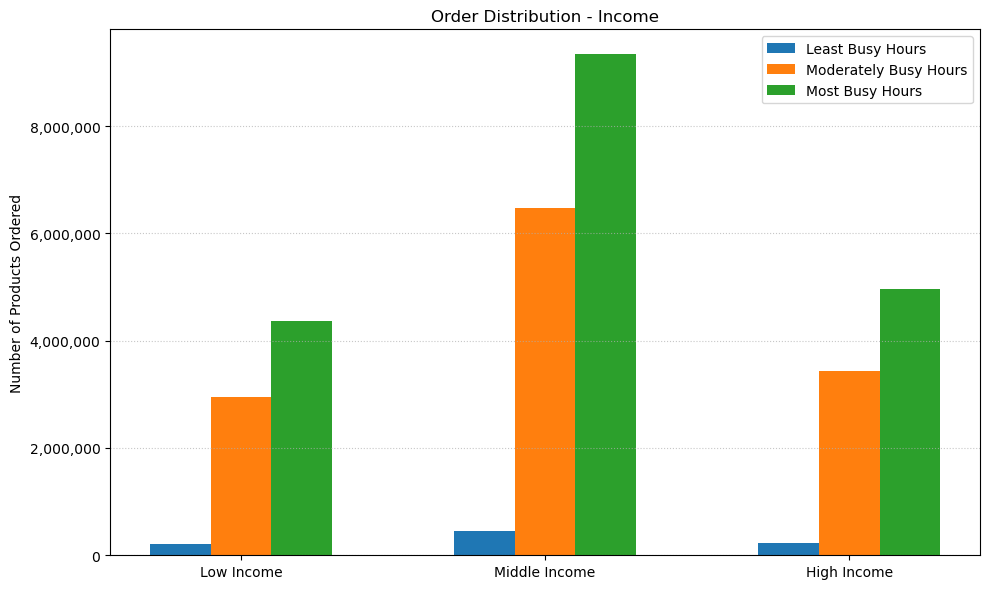

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.7.4_income_hours.png


In [74]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(cross_income_hours.index))

# Plot each category as a separate bar (grouped format)
for i, income_hours in enumerate(cross_income_hours.columns):
    plt.bar(
        x + i * bar_width, 
        cross_income_hours[income_hours], 
        width=bar_width, 
        label=income_hours
    )

# Formatting
plt.title('Order Distribution - Income')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')


# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(cross_income_hours.columns) - 1) / 2), cross_income_hours.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.7.4_income_hours.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.7.5. Price Label

In [75]:
# Create a cross-tabulation
order_income_price = pd.crosstab(df['income_profile'], df['price_label'])
order_income_price

price_label,Low Price,Mid Price,High Price,Premium Price
income_profile,,,,
Low Income,2225475,3752733,1476341,66384
Middle Income,3857502,8245941,3922948,225754
High Income,2053072,4370391,2086765,120413


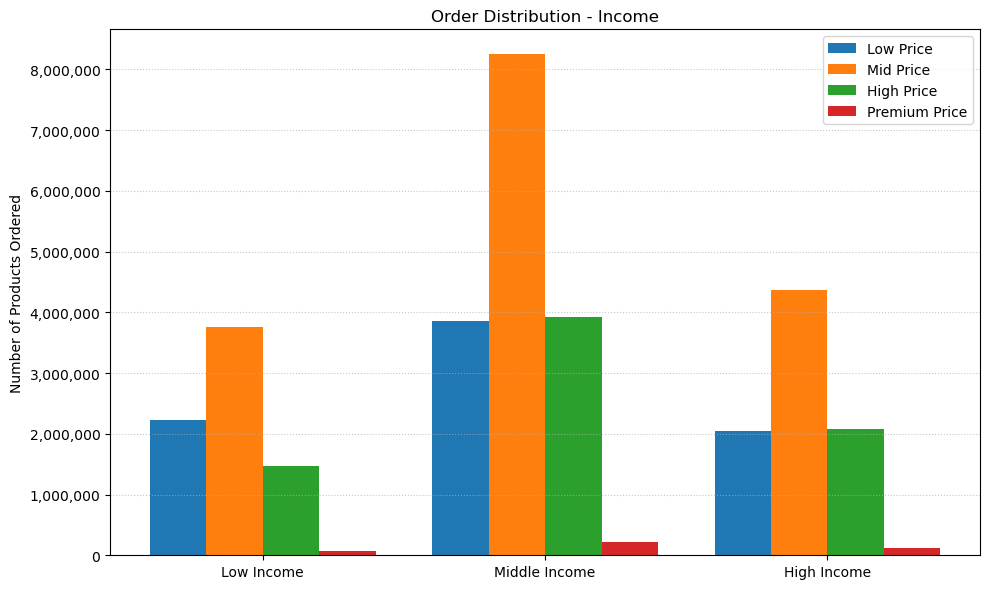

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.7.5_income_price.png


In [76]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(order_income_price.index))

# Plot each category as a separate bar (grouped format)
for i, income_price in enumerate(order_income_price.columns):
    plt.bar(
        x + i * bar_width, 
        order_income_price[income_price], 
        width=bar_width, 
        label=income_price
    )

# Formatting
plt.title('Order Distribution - Income')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(order_income_price.columns) - 1) / 2), order_income_price.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.7.5_income_price.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 3.8. Family Status

### 3.8.1. Customer Distribution

In [77]:
# Count the number of users per activity flag
family_counts = df.groupby('family_status', observed=False)['user_id'].nunique().reset_index()
family_counts

,family_status,user_id
0,Single Adult,51602
1,Young Parent,9701
2,Family,144906


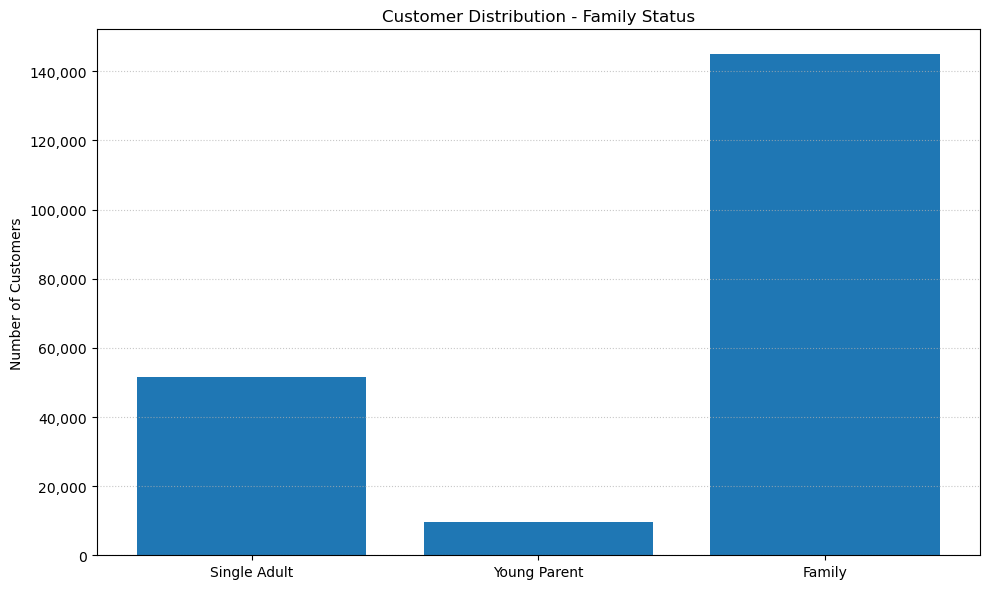

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.8.1_family_profile.png


In [78]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(family_counts['family_status'], family_counts['user_id'])

# Set the title and labels
plt.title('Customer Distribution - Family Status')
plt.xlabel('')
plt.ylabel('Number of Customers')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.8.1_family_profile.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.8.2. Order Distribution

In [79]:
# Count the number of orders per activity flag
order_family_counts = df['family_status'].value_counts().sort_index().reset_index()
order_family_counts.columns = ['family_status', 'count']
order_family_counts

,family_status,count
0,Single Adult,8097297
1,Young Parent,1550545
2,Family,22755877


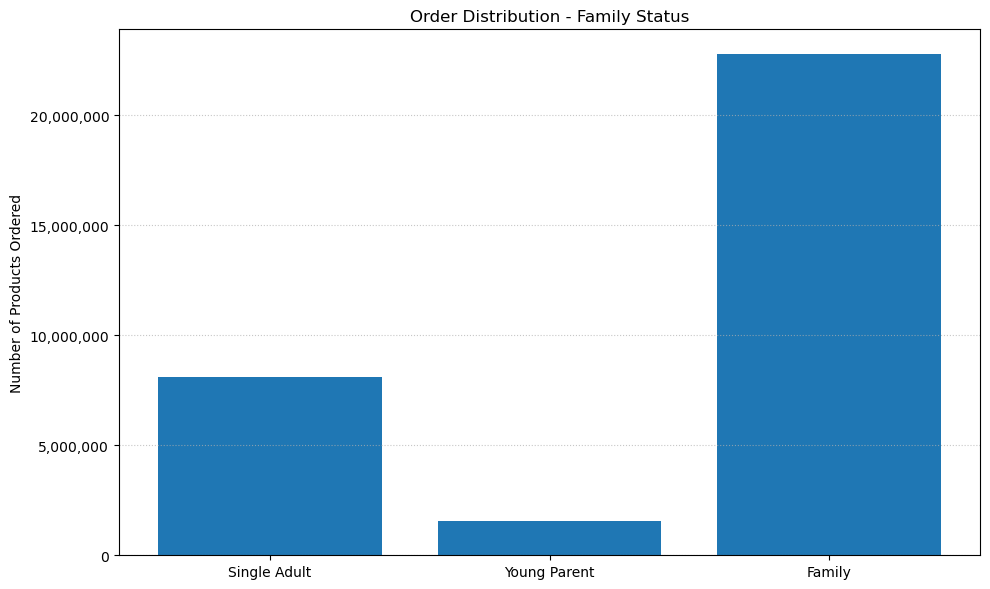

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.8.2_family_orders.png


In [80]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(order_family_counts['family_status'], order_family_counts['count'])

# Formatting
plt.title('Order Distribution - Family Status')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.8.2_family_orders.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.8.3. Busiest Days

In [81]:
# Create a cross-tabulation
cross_family_days = pd.crosstab(df['family_status'], df['busiest_days'])
cross_family_days

busiest_days,Least Busy Days,Moderately Busy Days,Most Busy Days
family_status,,,
Single Adult,1904512,3217777,2975008
Young Parent,363095,620855,566595
Family,5356517,9077025,8322335


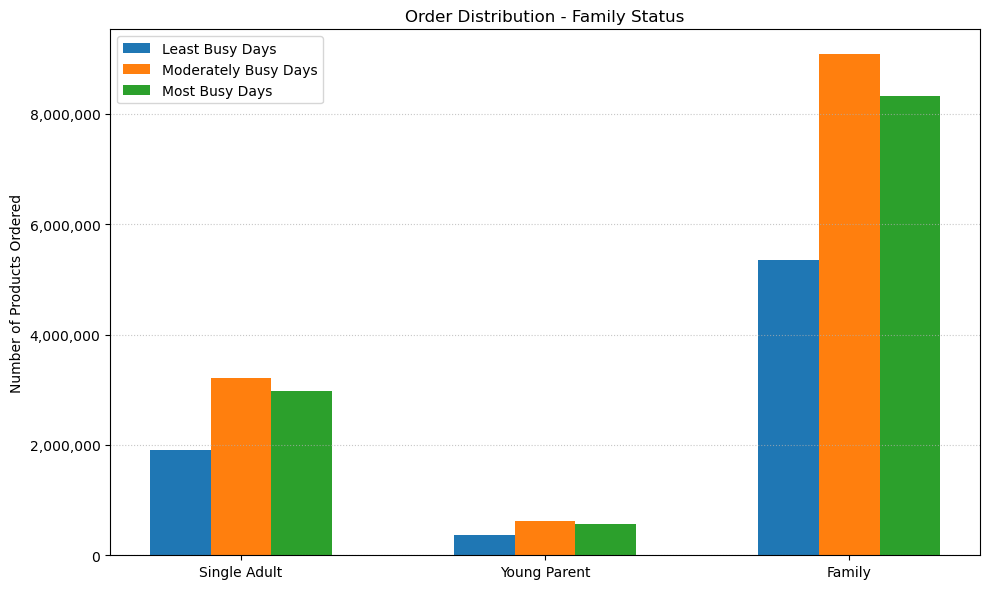

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.8.3_family_days.png


In [82]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(cross_family_days.index))

# Plot each category as a separate bar (grouped format)
for i, family_days in enumerate(cross_family_days.columns):
    plt.bar(
        x + i * bar_width, 
        cross_family_days[family_days], 
        width=bar_width, 
        label=family_days
    )
   
# Formatting
plt.title('Order Distribution - Family Status')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(cross_family_days.columns) - 1) / 2), cross_family_days.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.8.3_family_days.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.8.4. Busiest Hours

In [83]:
# Create a cross-tabulation
cross_family_hours = pd.crosstab(df['family_status'], df['busiest_hours'])
cross_family_hours

busiest_hours,Least Busy Hours,Moderately Busy Hours,Most Busy Hours
family_status,,,
Single Adult,221378,3221657,4654262
Young Parent,46382,609975,894188
Family,619043,9022152,13114682


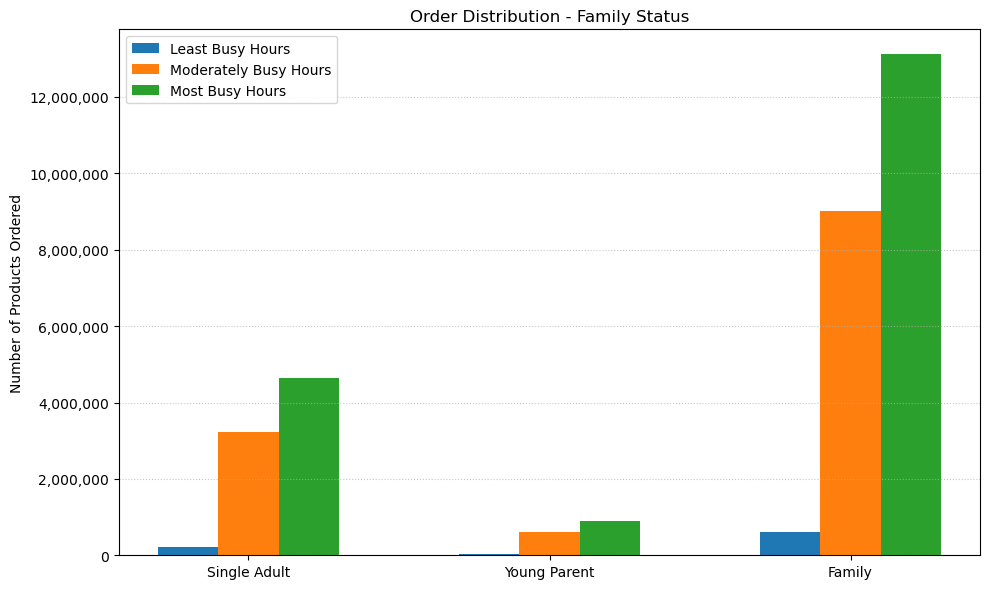

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.8.4_family_hours.png


In [84]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(cross_family_hours.index))

# Plot each category as a separate bar (grouped format)
for i, family_hours in enumerate(cross_income_hours.columns):
    plt.bar(
        x + i * bar_width, 
        cross_family_hours[family_hours], 
        width=bar_width, 
        label=family_hours
    )

# Formatting
plt.title('Order Distribution - Family Status')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(cross_family_hours.columns) - 1) / 2), cross_family_hours.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.8.4_family_hours.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.8.5. Price Label

In [85]:
# Create a cross-tabulation
order_family_price = pd.crosstab(df['family_status'], df['price_label'])
order_family_price

price_label,Low Price,Mid Price,High Price,Premium Price
family_status,,,,
Single Adult,2032800,4093237,1870311,100949
Young Parent,388249,782115,360414,19767
Family,5715000,11493713,5255329,291835


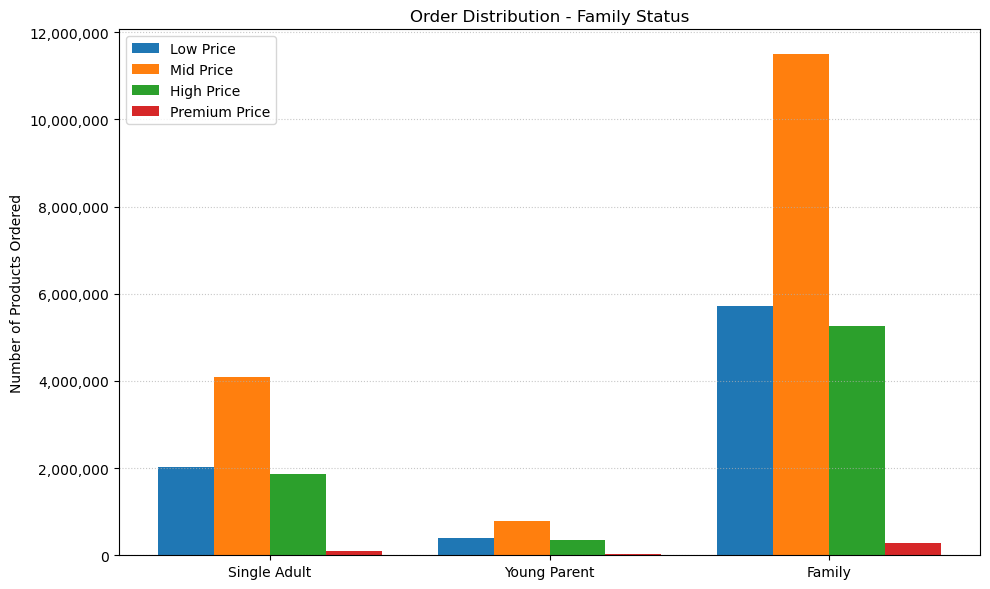

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Profile/3.8.5_family_price.png


In [86]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(order_family_price.index))

# Plot each category as a separate bar (grouped format)
for i, family_price in enumerate(order_family_price.columns):
    plt.bar(
        x + i * bar_width, 
        order_family_price[family_price], 
        width=bar_width, 
        label=family_price
    )

# Formatting
plt.title('Order Distribution - Family Status')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(order_family_price.columns) - 1) / 2), order_family_price.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Profile', '3.8.5_family_price.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")